# PCA Demo: Recreating Seasonality Pattern Analysis of Northern CA Birds

In [1]:
import matplotlib.pyplot as plt
palette = plt.get_cmap('Set1')
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing


pd.set_option('display.max_rows', 500)

### Read in the Data

In [2]:
birds = pd.read_csv("./birds_weekly.csv")

In [3]:
birds.head(20)

,Unnamed: 0,species,week,density
0,Allen's Hummingbird1,Allen's Hummingbird,1,0.007330
1,Allen's Hummingbird2,Allen's Hummingbird,2,0.009237
2,Allen's Hummingbird3,Allen's Hummingbird,3,0.011427
3,Allen's Hummingbird4,Allen's Hummingbird,4,0.013898
4,Allen's Hummingbird5,Allen's Hummingbird,5,0.016626
5,Allen's Hummingbird6,Allen's Hummingbird,6,0.019572
6,Allen's Hummingbird7,Allen's Hummingbird,7,0.022685
7,Allen's Hummingbird8,Allen's Hummingbird,8,0.025899
8,Allen's Hummingbird9,Allen's Hummingbird,9,0.029134
9,Allen's Hummingbird10,Allen's Hummingbird,10,0.032305


The data is in long format. We can pivot it into wide format so the sklearn PCA function can handle it. 

In [4]:
birds_wide=pd.pivot(birds, index='species', columns = 'week',values = 'density') #Reshape from long to wide


In [5]:
birds_wide.head()

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
species,,,,,,,,,,,,,,,,,,,,,
Allen's Hummingbird,0.007330,0.009237,0.011427,0.013898,0.016626,0.019572,0.022685,0.025899,0.029134,0.032305,...,0.001871,0.001515,0.001211,0.000953,0.000738,0.000562,0.000419,0.000306,0.000219,0.000153
American Bittern,0.016547,0.018062,0.019380,0.020455,0.021262,0.021790,0.022042,0.022038,0.021806,0.021388,...,0.020193,0.020018,0.019681,0.019150,0.018405,0.017440,0.016268,0.014918,0.013432,0.011864
American Kestrel,0.023152,0.025292,0.027117,0.028550,0.029543,0.030077,0.030156,0.029810,0.029087,0.028051,...,0.023129,0.023504,0.023653,0.023550,0.023175,0.022515,0.021572,0.020359,0.018906,0.017261
American coot,0.004319,0.005091,0.005970,0.006971,0.008103,0.009368,0.010757,0.012246,0.013799,0.015363,...,0.032437,0.033668,0.034511,0.034904,0.034802,0.034181,0.033042,0.031412,0.029344,0.026922
American crow,0.001435,0.001759,0.002170,0.002699,0.003381,0.004255,0.005362,0.006735,0.008400,0.010368,...,0.022180,0.022062,0.021720,0.021142,0.020326,0.019280,0.018026,0.016595,0.015029,0.013378


Let's plot it to make sure it makes sense.

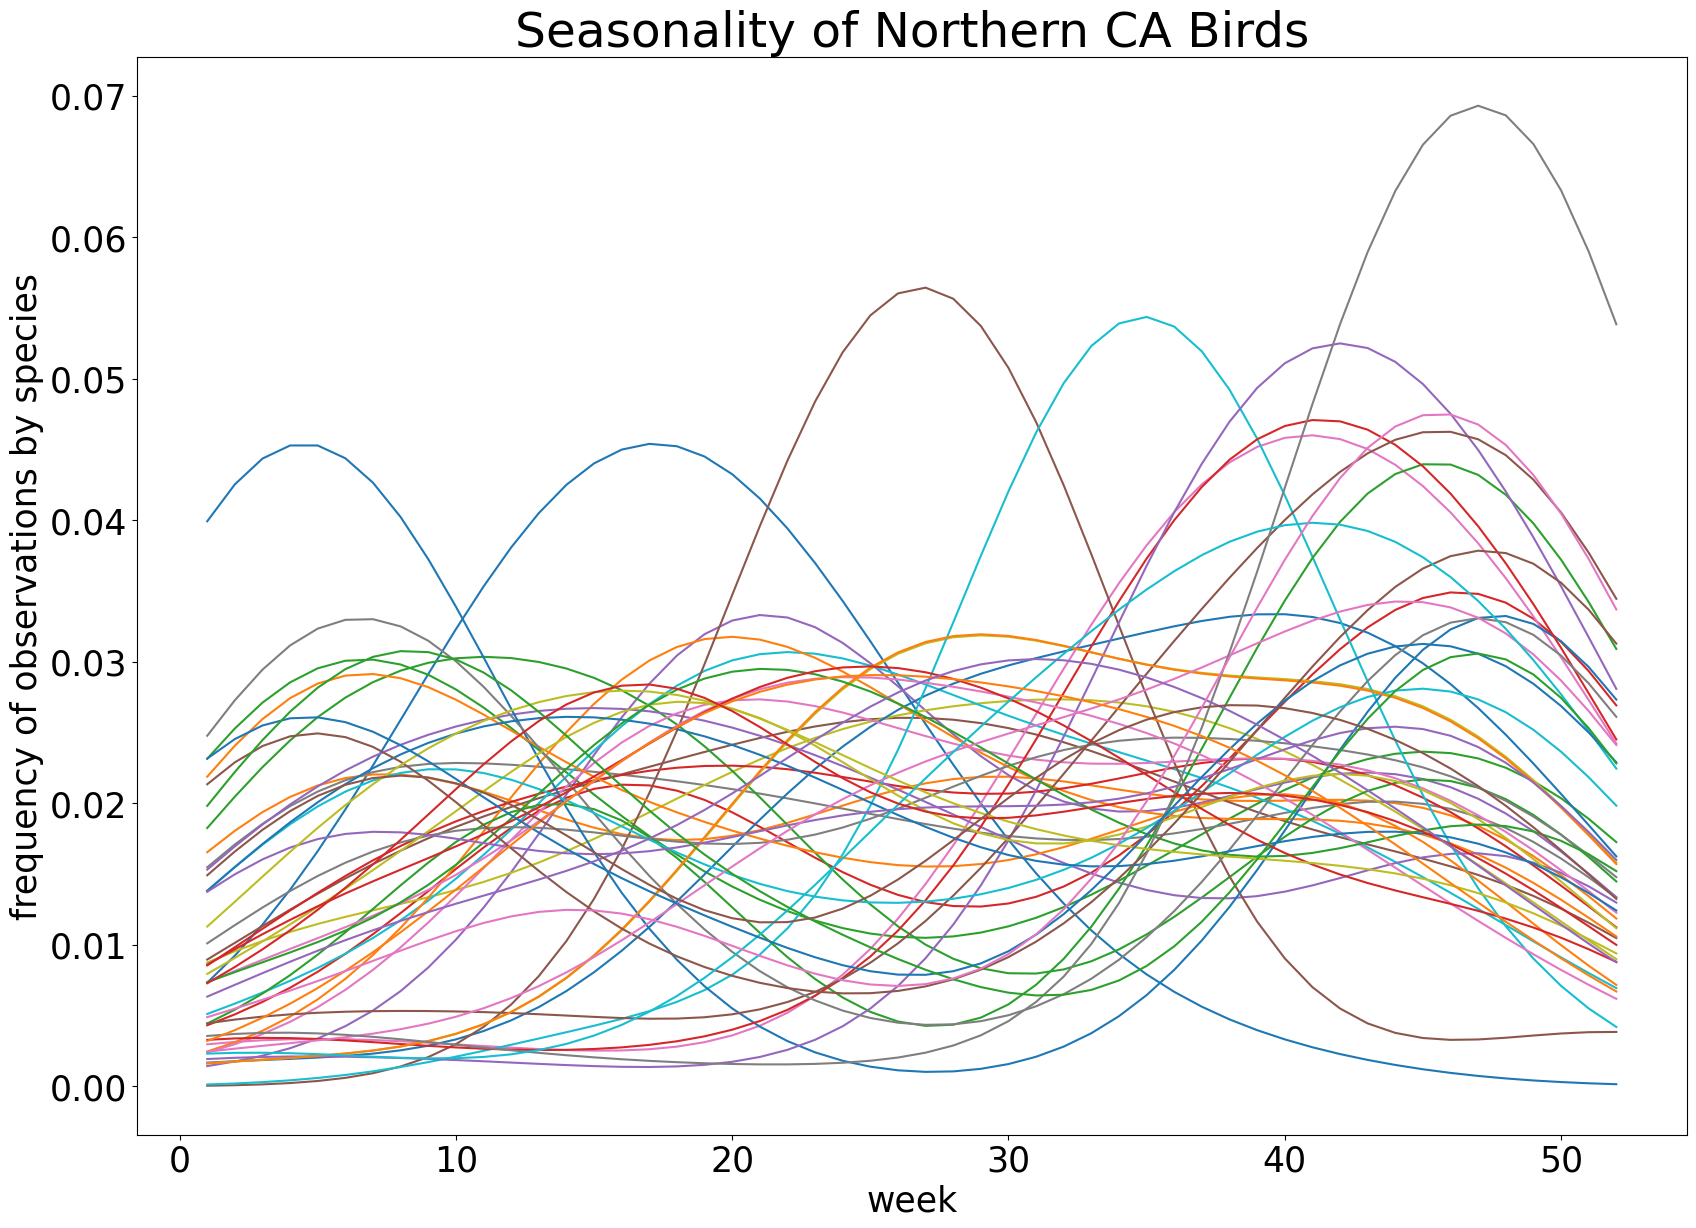

In [6]:
plot = birds_wide.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Seasonality of Northern CA Birds',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("frequency of observations by species", fontsize=25)
plot.set_xlabel("week", fontsize=25)


fig = plot.get_figure() ;

In [7]:
birds_wide.index

Index(['Allen's Hummingbird', 'American Bittern', 'American Kestrel',
       'American coot', 'American crow', 'American oystercatcher',
       'Anna's Hummingbird', 'Bald Eagle', 'Barn Owl', 'California Quail',
       'California Scrub-Jay', 'California Towhee', 'Cedar Waxwing',
       'Chestnut-backed Chickadee', 'Common loon', 'Common nighthawk',
       'Common raven', 'Cooper's Hawk', 'Dark-eyed Junco', 'Elegant tern',
       'Ferruginous hawk', 'Golden Eagle', 'Golden-crowned sparrow',
       'Great Blue heron', 'Great egret', 'Grebes', 'Green heron',
       'Hooded merganser', 'Killdeer', 'Northern flicker', 'Oak Titmouse',
       'Oregon Junco', 'Pacific loon', 'Pelagic cormorant', 'Peregrine Falcon',
       'Pintails', 'Red-shouldered Hawk', 'Red-tailed Hawk', 'Rock Pigeon',
       'Snowy egret', 'Sora', 'Steller's Jay', 'Varied thrush', 'Whimbrel',
       'White pelicans', 'Willet', 'Yellow-rumped Warbler'],
      dtype='object', name='species')

## Let's label a few example bird's curves

In [8]:
## how to label curves

ex_birds = ['Ferruginous hawk', "Allen's Hummingbird", "Common nighthawk", "Elegant tern", "Red-tailed Hawk"]
ex_birds_df = birds_wide.loc[ex_birds,:]

In [9]:
max_values = ex_birds_df.max(axis=1)
max_weeks = ex_birds_df.idxmax(axis=1).apply(lambda x: ex_birds_df.columns.get_loc(x))

# Combine into a DataFrame or print them
label_locations = pd.DataFrame({
    'max': max_values,
    'max_week': max_weeks,
    },
    index = ex_birds_df.index
)

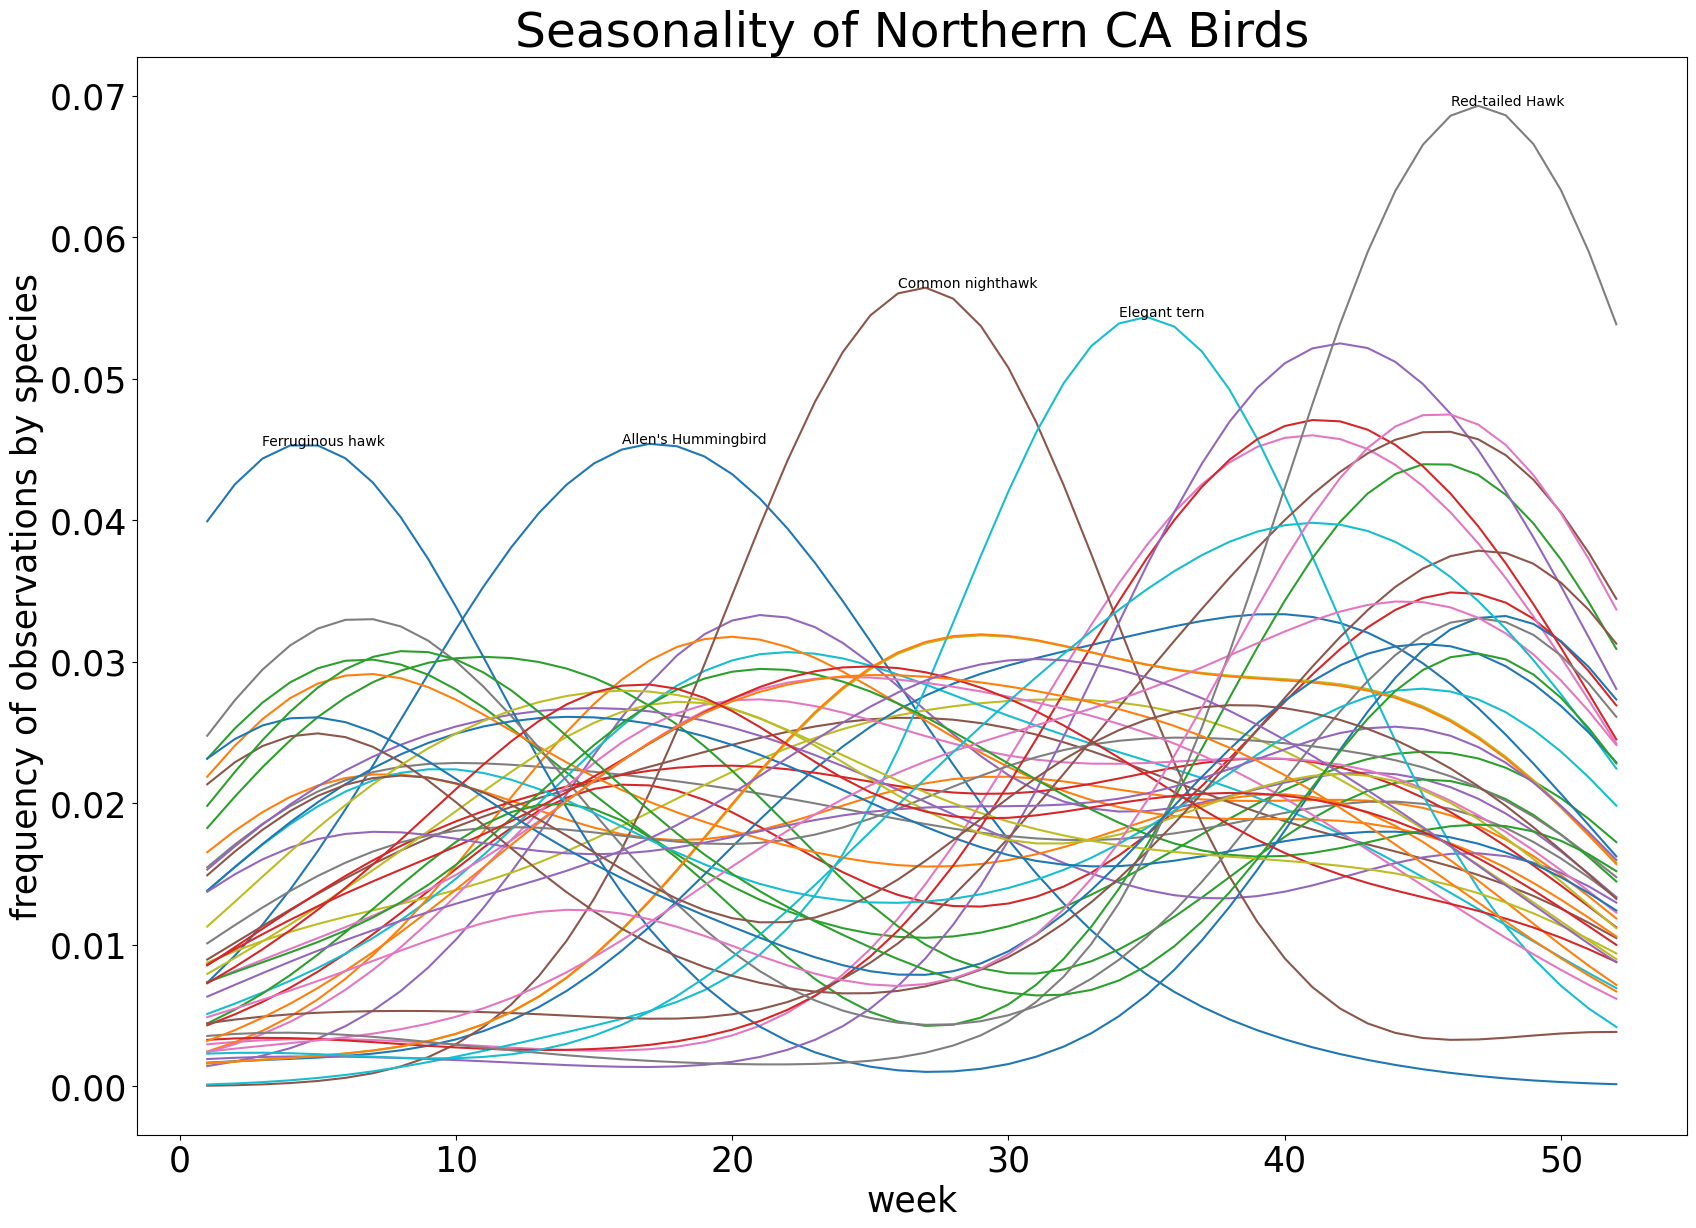

In [10]:
plot = birds_wide.T.plot(figsize = (20, 14), 
                         legend = None, 
                         title='Seasonality of Northern CA Birds',
                         fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("frequency of observations by species", fontsize=25)
plot.set_xlabel("week", fontsize=25)

for i, row in label_locations.iterrows():
    plt.annotate(i, (row['max_week'], row['max']))


fig = plot.get_figure();

## PCA and Identifying Archetypes

Normally when we do PCA we either completely standardize the data (by centering and scaling the data to have mean 0 and standard deviation 1), or just center it. Since densities are generally on the same scale across weeks we don't think it's necessary to scale, but centering is still important. **The PCA function will automatically do the centering for us!!**

In [11]:

birds_wide.shape
#center
#birds_wide = birds_wide.apply(lambda x: x-x.mean())

(47, 52)

In [12]:
birds_wide.head(5)

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
species,,,,,,,,,,,,,,,,,,,,,
Allen's Hummingbird,0.007330,0.009237,0.011427,0.013898,0.016626,0.019572,0.022685,0.025899,0.029134,0.032305,...,0.001871,0.001515,0.001211,0.000953,0.000738,0.000562,0.000419,0.000306,0.000219,0.000153
American Bittern,0.016547,0.018062,0.019380,0.020455,0.021262,0.021790,0.022042,0.022038,0.021806,0.021388,...,0.020193,0.020018,0.019681,0.019150,0.018405,0.017440,0.016268,0.014918,0.013432,0.011864
American Kestrel,0.023152,0.025292,0.027117,0.028550,0.029543,0.030077,0.030156,0.029810,0.029087,0.028051,...,0.023129,0.023504,0.023653,0.023550,0.023175,0.022515,0.021572,0.020359,0.018906,0.017261
American coot,0.004319,0.005091,0.005970,0.006971,0.008103,0.009368,0.010757,0.012246,0.013799,0.015363,...,0.032437,0.033668,0.034511,0.034904,0.034802,0.034181,0.033042,0.031412,0.029344,0.026922
American crow,0.001435,0.001759,0.002170,0.002699,0.003381,0.004255,0.005362,0.006735,0.008400,0.010368,...,0.022180,0.022062,0.021720,0.021142,0.020326,0.019280,0.018026,0.016595,0.015029,0.013378


In [13]:
pca = PCA() 
pc_scores = pca.fit_transform(birds_wide) 

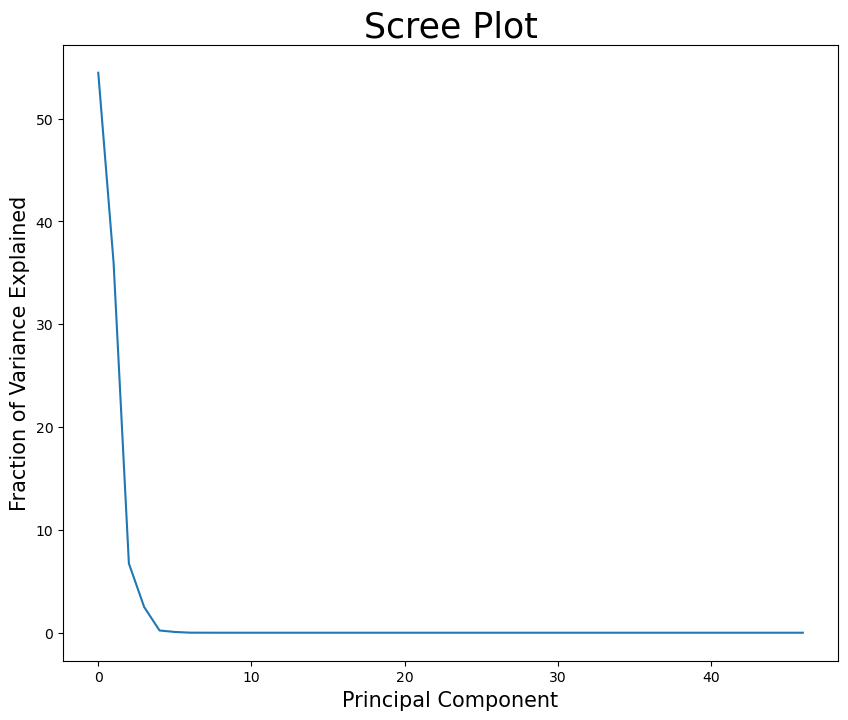

In [14]:
per_var = 100*pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(per_var))]

plt.figure(figsize=(10,8))
plt.plot(per_var)
plt.ylabel('Fraction of Variance Explained', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Scree Plot', fontsize=25)
plt.show()



In [15]:
per_var

array([5.44612990e+01, 3.60157757e+01, 6.73183772e+00, 2.48998686e+00,
       2.17501208e-01, 7.43041358e-02, 6.02817764e-03, 2.92844630e-03,
       3.15622639e-04, 1.80850226e-05, 4.41340768e-06, 6.07563761e-07,
       2.64324262e-08, 2.77227371e-09, 8.94934176e-11, 9.90165928e-12,
       4.42276871e-13, 2.59485092e-14, 2.36983704e-15, 7.84414288e-17,
       2.40331926e-18, 5.65267310e-20, 1.81392154e-21, 3.02801387e-23,
       2.39548618e-24, 8.34825493e-25, 1.25133198e-26, 3.35124965e-28,
       3.75743996e-29, 3.47719092e-29, 3.00023220e-29, 2.58662772e-29,
       2.12478469e-29, 1.91393527e-29, 1.57127150e-29, 1.31650958e-29,
       1.14450386e-29, 1.06462003e-29, 7.56321244e-30, 6.73988747e-30,
       6.24469671e-30, 3.85094560e-30, 3.20670644e-30, 2.68099062e-30,
       1.77898524e-30, 5.57921653e-31, 1.05478125e-31])

In [16]:
np.cumsum(per_var)

array([ 54.461299  ,  90.4770747 ,  97.20891242,  99.69889927,
        99.91640048,  99.99070462,  99.9967328 ,  99.99966124,
        99.99997686,  99.99999495,  99.99999936,  99.99999997,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

## Visualize the Eigenvectors

In [17]:
pca.components_.shape

(47, 52)

In [18]:
#first 2 eigenvectors:
k = 2 

eigenvecs = pca.components_[:k, :]
eigenvecs_df = pd.DataFrame(data = eigenvecs.T, 
                            columns = [r'$\hat{\phi}_1$', r'$\hat{\phi}_2$'],
                            index = np.arange(1, 53, 1))

In [19]:
eigenvecs_df.head()

,$\hat{\phi}_1$,$\hat{\phi}_2$
1,-0.016253,0.165685
2,-0.021377,0.180870
3,-0.027240,0.193597
4,-0.033823,0.203228
5,-0.041076,0.209334


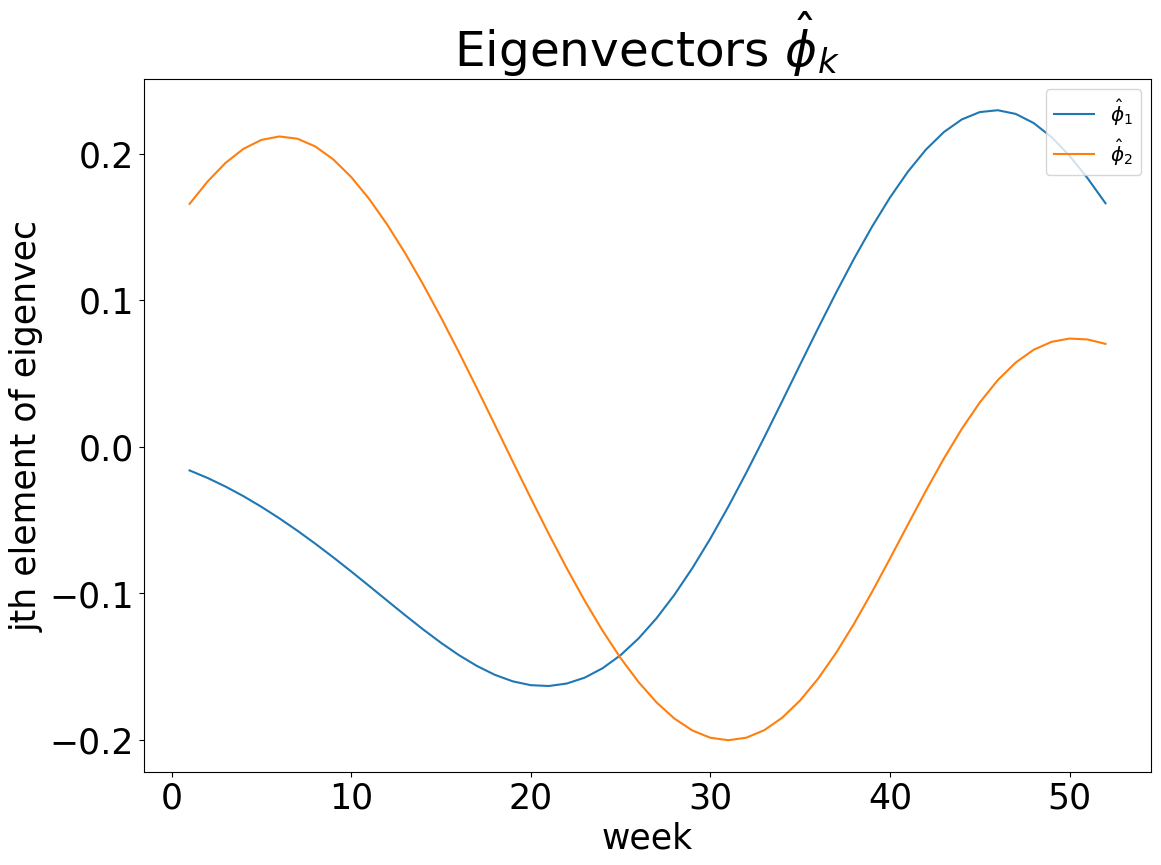

In [20]:
plot = eigenvecs_df.plot(figsize = (13, 9), 
                        title='Eigenvectors '+r'$\hat{\phi}_k$',
                        fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("jth element of eigenvec", fontsize=25)
plot.set_xlabel("week", fontsize=25)
plot.legend(loc=1, fontsize = 'x-large')
fig = plot.get_figure();

## Interpretation of Eigenvectors:

- 1st eigenvec: contrast between late fall and late spring (positive PC1 scores -- more prevalence in late fall than late spring)
- 2nd eigenvec: contrast between winter and summer (positive PC1 scores -- more prevalence in winter than summer)

## Reconstructing original data with low rank approximations

In [21]:
#rank k approx:

#first approximate the centered versions
lowrank_approx_without_mean = pc_scores[:, :k] @ pca.components_[:k, :]

# reconstruct the data by adding the mean back in
lowrank_approx = lowrank_approx_without_mean + pca.mean_

#put into pd.DataFrame
lowrank_approx_df = pd.DataFrame(lowrank_approx.round(5), columns=birds_wide.columns, index=birds_wide.index)

Demo on first 4 birds:

In [22]:
birds_wide.index[0:4].to_list()

["Allen's Hummingbird",
 'American Bittern',
 'American Kestrel',
 'American coot']

In [23]:
## let's look at the first 4 birds' low rank approximations:
lowrank_approx_df.iloc[0:4,:]

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
species,,,,,,,,,,,,,,,,,,,,,
Allen's Hummingbird,0.01633,0.01844,0.02050,0.02248,0.02435,0.02610,0.02771,0.02920,0.03057,0.03183,...,-0.00050,-0.00104,-0.00144,-0.00171,-0.00187,-0.00193,-0.00191,-0.00184,-0.00173,-0.00158
American Bittern,0.01223,0.01359,0.01487,0.01605,0.01710,0.01801,0.01880,0.01946,0.02003,0.02050,...,0.02128,0.02130,0.02115,0.02078,0.02019,0.01937,0.01833,0.01709,0.01567,0.01414
American Kestrel,0.01906,0.02099,0.02273,0.02421,0.02540,0.02630,0.02688,0.02718,0.02722,0.02702,...,0.02432,0.02535,0.02604,0.02635,0.02623,0.02569,0.02473,0.02338,0.02170,0.01976
American coot,0.01127,0.01237,0.01336,0.01421,0.01491,0.01545,0.01583,0.01608,0.01621,0.01624,...,0.03152,0.03193,0.03199,0.03167,0.03094,0.02982,0.02831,0.02646,0.02432,0.02197


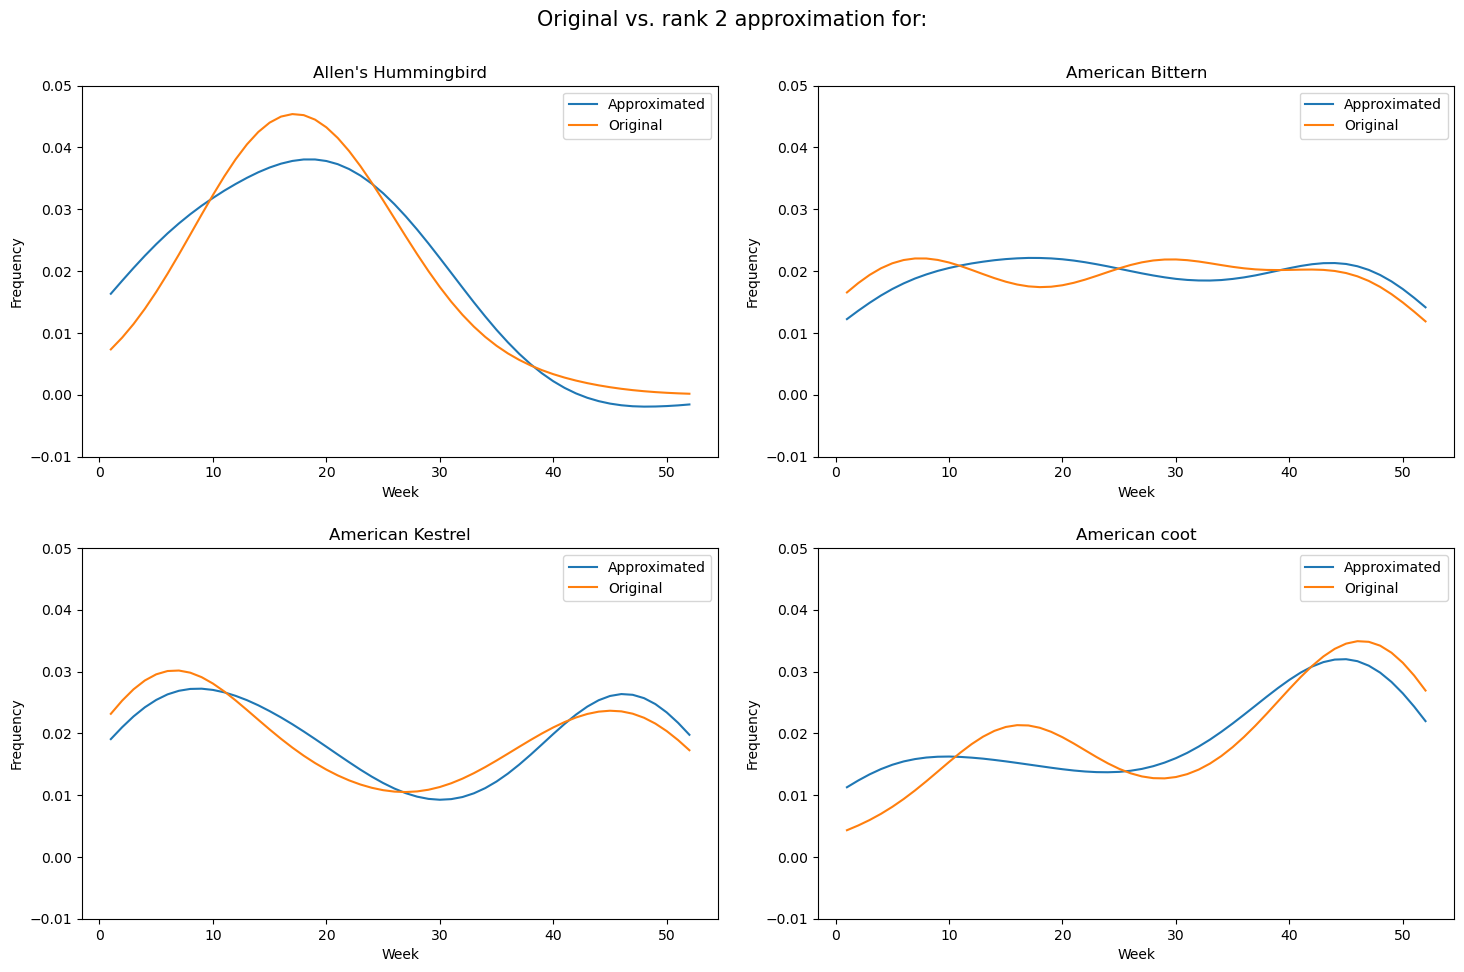

In [27]:
#let's plot the originals vs. the reconstructed:


fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten()

birds_list=birds_wide.index[0:4].to_list()
for i in range(len(birds_list)):
    ax[i].plot(lowrank_approx_df.columns, lowrank_approx_df.loc[birds_list[i],: ], label='Approximated')
    ax[i].plot(birds_wide.columns, birds_wide.loc[birds_list[i],: ], label='Original')
    ax[i].set_title(birds_list[i])
    ax[i].set_xlabel('Week')
    ax[i].set_ylabel('Frequency')
    ax[i].set_ylim(-0.01, 0.05)  # Set the y-axis limits uniformly across subplots
    ax[i].legend()
plt.suptitle("Original vs. rank 2 approximation for:", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

In [28]:
scores_df = pd.DataFrame(pc_scores[:, :k], 
                         columns = ['PC1_score', 'PC2_score'],  
                          index =  birds_wide.T.columns)

Text(0.5, 0, 'PC1')

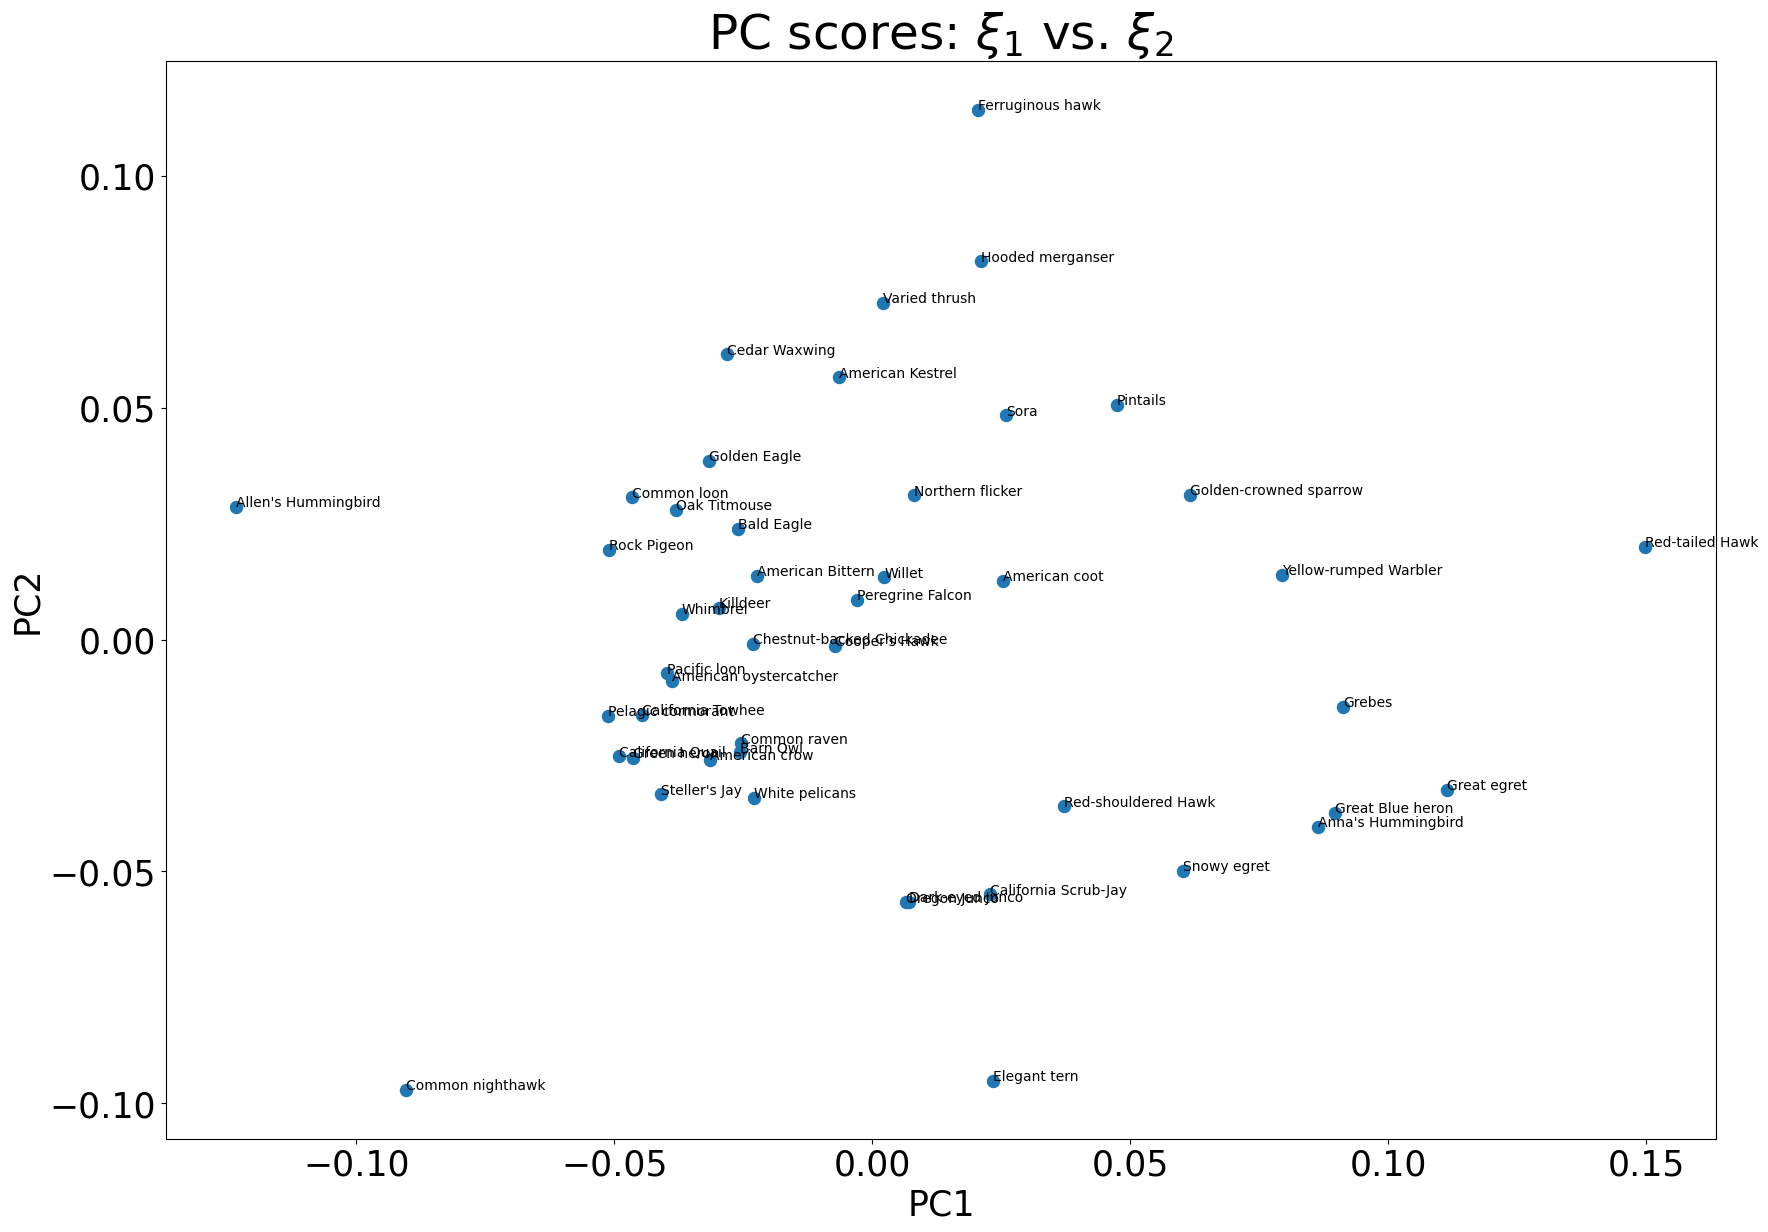

In [29]:
fig, ax = plt.subplots(figsize = (20, 14))
plot = scores_df.plot('PC1_score', 'PC2_score', kind='scatter', ax=ax,
                   title=r'PC scores: '+r'$\xi_1$'+' vs. '+r'$\xi_2$',
                  fontsize = 25, s=75)
for i, row in scores_df.iterrows():
    plt.annotate(i, (row['PC1_score'], row['PC2_score']))
    
plot.title.set_size(35)
plot.set_ylabel("PC2", fontsize=25)
plot.set_xlabel("PC1", fontsize=25)

## What if I want the seasons to go clockwise instead of counterclockwise?

I can flip principal component directions... let's flip the first one:

In [30]:
#initialize
eigenvecs_df_flipped = eigenvecs_df

In [31]:
eigenvecs_df_flipped.shape

(52, 2)

In [32]:
#flip second eigenvec
eigenvecs_df_flipped.iloc[:,0] = -eigenvecs_df.iloc[:,0]

In [33]:
#also flip corresponding PC scores:
scores_df_flipped = scores_df

scores_df_flipped.iloc[:,0] = -scores_df.iloc[:,0]

### Visualize the new eigenvecs/principal component directions:


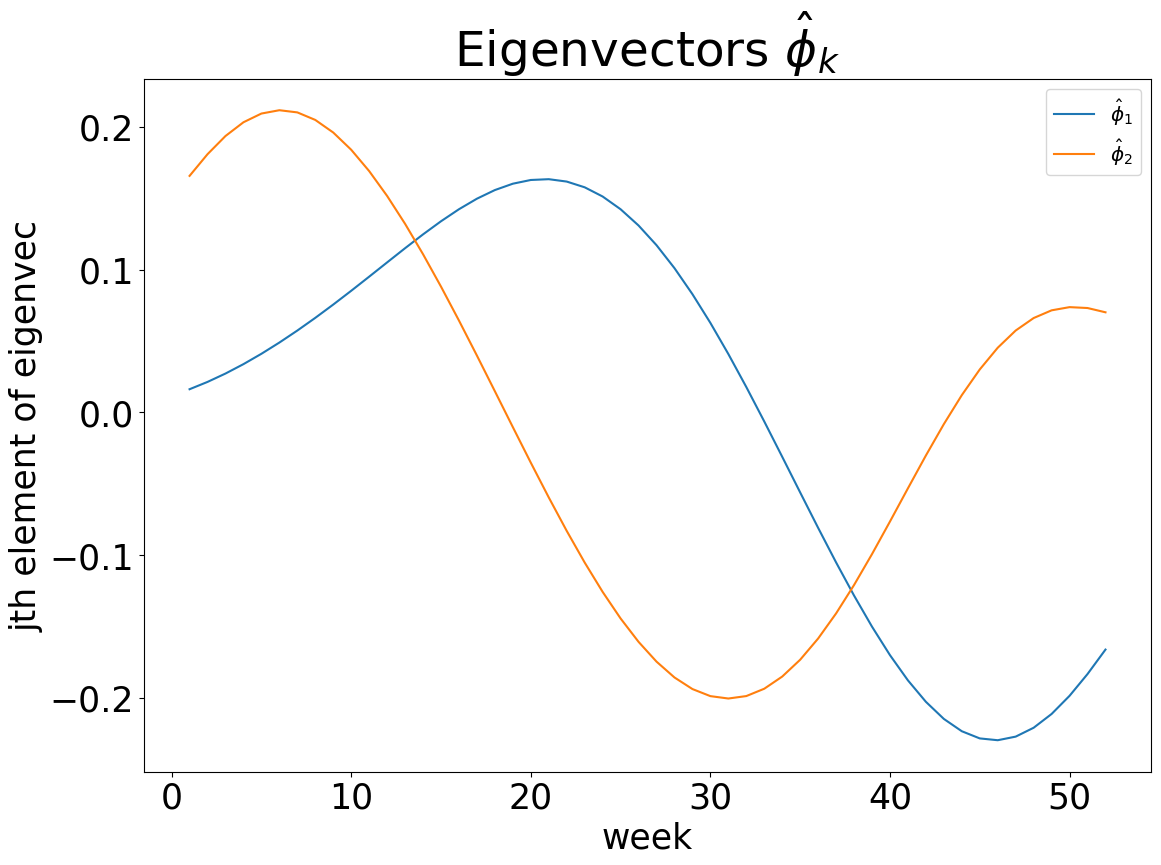

In [34]:
plot = eigenvecs_df_flipped.plot(figsize = (13, 9), 
                        title='Eigenvectors '+r'$\hat{\phi}_k$',
                        fontsize = 25)
plot.title.set_size(35)
plot.set_ylabel("jth element of eigenvec", fontsize=25)
plot.set_xlabel("week", fontsize=25)
plot.legend(loc=1, fontsize = 'x-large')
fig = plot.get_figure();

## Interpretation of Eigenvectors:

- 1st eigenvec: contrast between  spring and fall (positive PC1 scores -- more prevalence in late spring than late fall)
- 2nd eigenvec: contrast between winter (positive PC2 scores -- more prevalence in winter than summer)

Notice -- the direction of the eigenvector changes the interpretation of the sign of the 2nd PC score... but ultimately the underlying meaning has not changed: spring vs. fall or fall vs. spring! 

## Visualize new PC scores

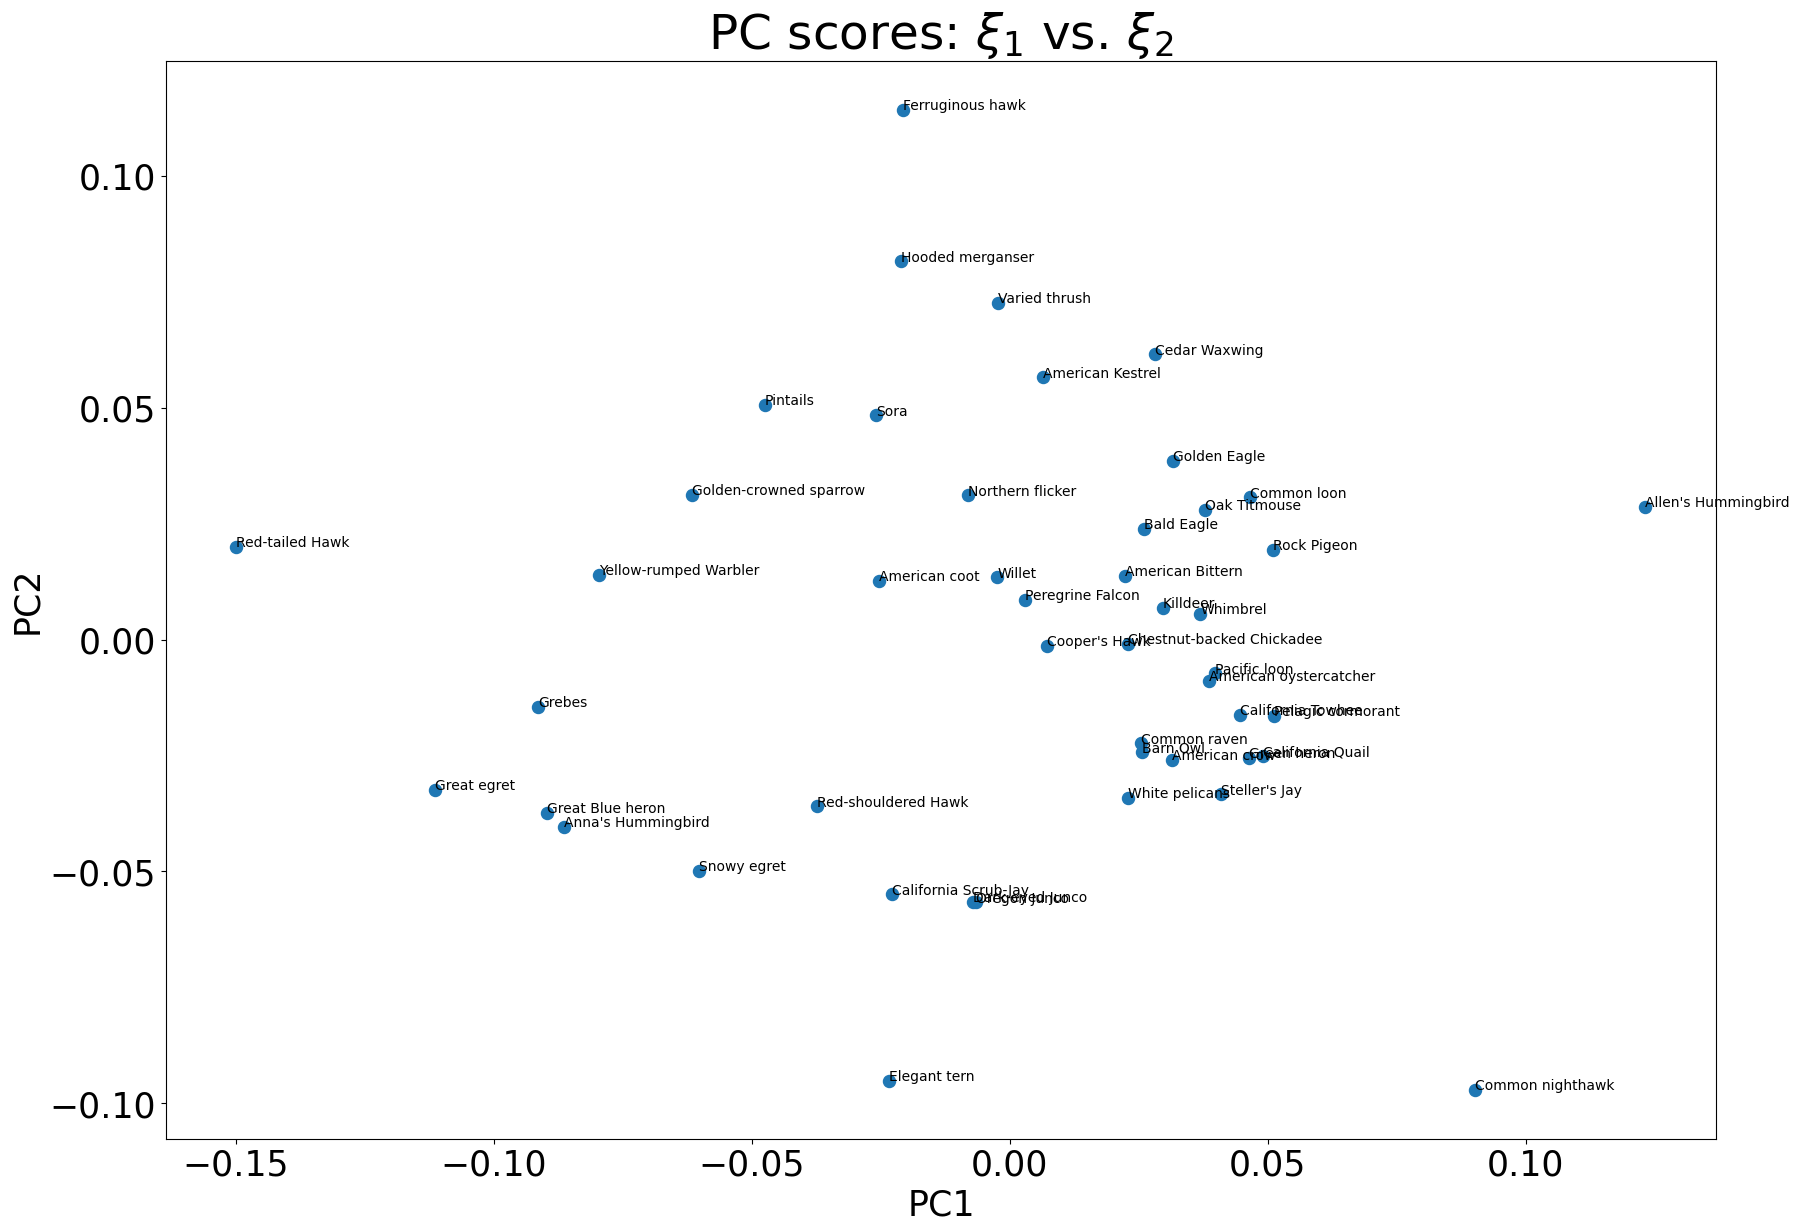

In [35]:
fig, ax = plt.subplots(figsize = (20, 14))
plot = scores_df_flipped.plot('PC1_score', 'PC2_score', kind='scatter', ax=ax,
                   title=r'PC scores: '+r'$\xi_1$'+' vs. '+r'$\xi_2$',
                  fontsize = 25, s=75)
for i, row in scores_df.iterrows():
    plt.annotate(i, (row['PC1_score'], row['PC2_score']))
    
plot.title.set_size(35)
plot.set_ylabel("PC2", fontsize=25)
plot.set_xlabel("PC1", fontsize=25)
fig = plot.get_figure();

## Exercises:

1. Devise a data-driven way to identify and label archetypal birds (e.g the 5 given in the original EDA density plot). 

2. Label all birds' density curve projections into 2D principal component space.

3. Shade the principal component space according to the 4 seasonal regions.

4. Estimate and visualize the covariance matrix (surface) of the densities over time.

5. Consider the 3rd principal component. Does it have an interpretation? Plot it vs. PC1 and PC2 scores to look for any patterns.

6. Write a function which compares the original curve to the rank 2 approximation. What do you notice about the approximation?

7. Write a function which predicts an arbitrary density curve given a point in PC space. What do you notice about the values of the density? Are they always valid? 

8. Consider approaches to handle the constraints of densities: 1. the density is positive and 2. the density integrates (or approximately sums) to 1.0. What can we do to force the low rank approximations into these constraints after fitting the PCA? How about before fitting the PCA? (Hint: the difficulty lies in the face that the class of densities is not a vector space.) 

9. Write an animation which illustrates the seasonality of the birds via a point moving through PC space.

